=== Optimized Parameters ===
Theta (degrees): 28.1184
M: 0.021389
X: 54.9008
Optimization Success: True
Total L1 Distance: 37865.0939
Final L1 Distance (per point): 25.2434

=== Error Metrics ===
MAE (x): 16.4221
MAE (y): 8.8213
Total MAE: 12.6217
RMSE (x): 20.0540
RMSE (y): 10.7559
Total RMSE: 15.4050

==== Equation Format for Submission ====
\left(t*\cos(0.4908) - e^{0.021389\left|t\right|}\cdot\sin(0.3t)\sin(0.4908) + 54.9008, 42 + t*\sin(0.4908) + e^{0.021389\left|t\right|}\cdot\sin(0.3t)\cos(0.4908)\right)


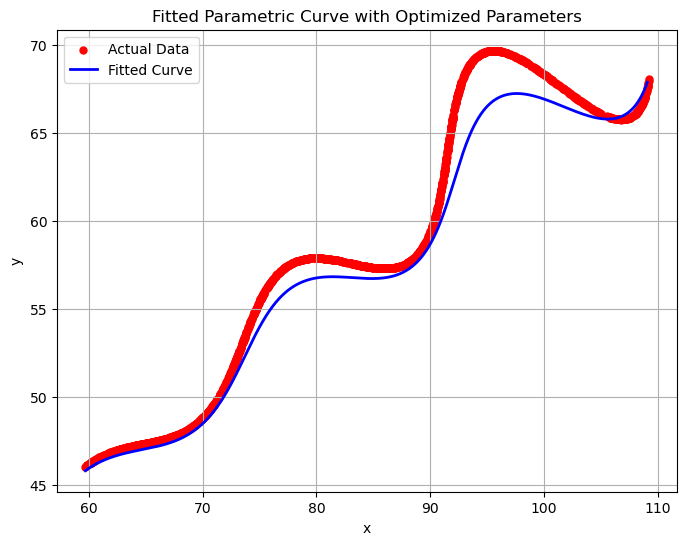

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: Load the given data
data = pd.read_csv("xy_data.csv")
x_data = data['x'].values
y_data = data['y'].values
t_data = np.linspace(6, 60, len(data))

# Step 2: Define the parametric curve
def parametric_curve(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y

# Step 3: Objective function (L1 distance)
def objective(params):
    theta, M, X = params
    x_pred, y_pred = parametric_curve(t_data, theta, M, X)
    l1_dist = np.sum(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))
    return l1_dist

# Step 4: Initial guess and bounds
theta_init = np.deg2rad(25)
M_init = 0.0
X_init = 50.0

bounds = [
    (np.deg2rad(0.1), np.deg2rad(50)),  # theta in radians
    (-0.05, 0.05),                      # M
    (0, 100)                            # X
]

# Step 5: Optimize parameters
result = minimize(objective, [theta_init, M_init, X_init], bounds=bounds, method='L-BFGS-B')
theta_opt, M_opt, X_opt = result.x
theta_deg = np.rad2deg(theta_opt)

# Step 6: Compute fitted values
x_fit, y_fit = parametric_curve(t_data, theta_opt, M_opt, X_opt)

# Step 7: Compute error metrics
mae_x = np.mean(np.abs(x_data - x_fit))
mae_y = np.mean(np.abs(y_data - y_fit))
rmse_x = np.sqrt(np.mean((x_data - x_fit)**2))
rmse_y = np.sqrt(np.mean((y_data - y_fit)**2))
total_mae = np.mean([mae_x, mae_y])
total_rmse = np.mean([rmse_x, rmse_y])
total_L1 = result.fun
avg_L1 = total_L1 / len(x_data)



# Step 8: Display results
print("=== Optimized Parameters ===")
print(f"Theta (degrees): {theta_deg:.4f}")
print(f"M: {M_opt:.6f}")
print(f"X: {X_opt:.4f}")
print("Optimization Success:", result.success)
print(f"Total L1 Distance: {total_L1:.4f}")
print(f"Final L1 Distance (per point): {avg_L1:.4f}\n")


print("=== Error Metrics ===")
print(f"MAE (x): {mae_x:.4f}")
print(f"MAE (y): {mae_y:.4f}")
print(f"Total MAE: {total_mae:.4f}")
print(f"RMSE (x): {rmse_x:.4f}")
print(f"RMSE (y): {rmse_y:.4f}")
print(f"Total RMSE: {total_rmse:.4f}")

# Step 9: Output the LaTeX-style equation
print("\n==== Equation Format for Submission ====")
print(f'\\left(t*\\cos({theta_opt:.4f}) - e^{{{M_opt:.6f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\sin({theta_opt:.4f}) + {X_opt:.4f}, '
      f'42 + t*\\sin({theta_opt:.4f}) + e^{{{M_opt:.6f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\cos({theta_opt:.4f})\\right)')

# Step 10: Plot the fitted curve
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, label="Actual Data", color="red", s=25)
plt.plot(x_fit, y_fit, label="Fitted Curve", color="blue", linewidth=2)
plt.title("Fitted Parametric Curve with Optimized Parameters")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()